# MLP on MINST dataset
---

In [19]:
import matplotlib.pyplot as plt
plt.rc("image", cmap="binary")
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow.keras as tfk
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

## MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Observation: usually we treat images with $l\times m\times 3$ dimensions, where 3 are the number of channels dedicated to colors. On the other hand, in this case we have pictures of dimensions $28\times 28\times 1$, which means we should expect black and white pictures.

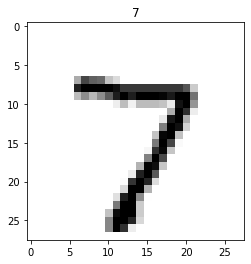

In [5]:
plt.imshow(x_test[0])
plt.title(y_test[0])
plt.show()

5


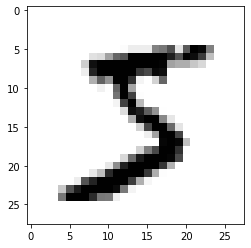

In [6]:
#Q: explore the dataset!
print(y_train[0])

plt.imshow(x_train[0])

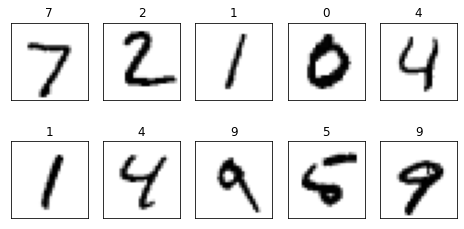

In [7]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title(y_test[i])
    plt.xticks(())
    plt.yticks(())

In [8]:
x_train[0].reshape(56,-1).shape

(56, 14)

### Preprocess

In [9]:
mx = np.max(x_train)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= mx # broadcasting
x_test /= mx

n_input = 28*28 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

x_train = x_train.reshape(-1, n_input)
x_test = x_test.reshape(-1, n_input)

In [10]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


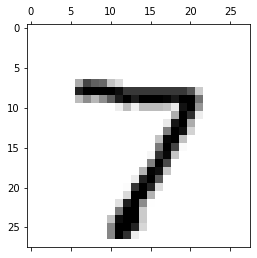

In [11]:
plt.matshow(x_test[0].reshape((28,28)))

## MLP on MNIST

In [12]:
mlp = Sequential()
mlp.add(Input(28*28))
mlp.add(Dense(128,activation='relu'))
mlp.add(Dense(10,activation='softmax'))
#
mlp.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [13]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
mlp_log = mlp.fit(x_train,
                  y_train,
                  validation_data=(x_test, y_test),
                  epochs=10,
                  batch_size=100,
                  verbose=1
                 )

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3323 - accuracy: 0.9074 - val_loss: 0.1791 - val_accuracy: 0.9477
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1528 - accuracy: 0.9559 - val_loss: 0.1280 - val_accuracy: 0.9611
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1096 - accuracy: 0.9682 - val_loss: 0.1036 - val_accuracy: 0.9701
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0831 - accuracy: 0.9756 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0673 - accuracy: 0.9805 - val_loss: 0.0797 - val_accuracy: 0.9761
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0553 - accuracy: 0.9837 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0456 - accuracy: 0.9870 - val_loss: 0.0813 - val_accuracy: 0.9754
Epoch 

In [15]:
mlp_log.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
def plot_curves(hist):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.subplot(1,2,2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')   

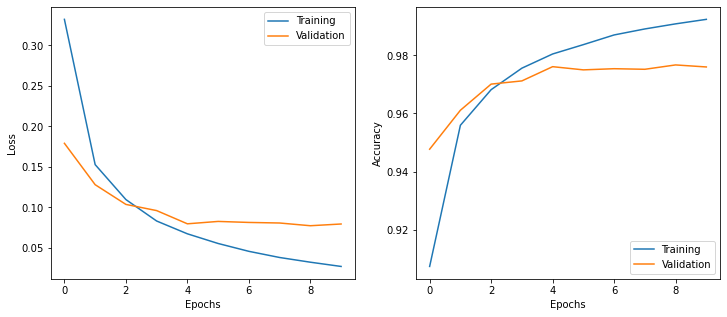

In [17]:
plot_curves(mlp_log)

240/10000 misclassified examples



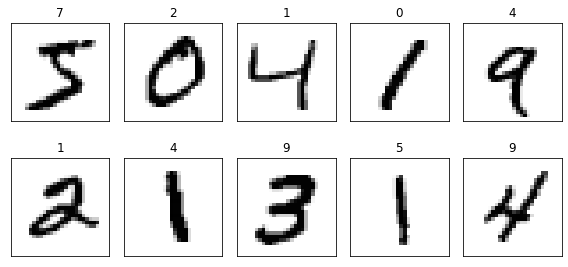

In [18]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()
predicted = mlp.predict(x_test).argmax(-1)
misclassified = [i for i,(p,l) in enumerate(zip(predicted,y_test_orig)) if not p==l]
print(len(misclassified),'/10000 misclassified examples\n',sep="")

plt.rc("image", cmap="binary")
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    index = np.random.choice(misclassified)
    plt.imshow(x_train_orig[i])
    plt.title(predicted[i])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

---

Let's import a new dataset and see how we perform

In [21]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")
#
print("train shape:", df_train.shape)
print("test shape:", df_test.shape)

train shape: (42000, 785)
test shape: (28000, 784)


In [29]:
x_train = df_train[[x for x in df_train.columns if x!="label"]].to_numpy()
y_train = df_train["label"].to_numpy()

x_test = df_test.to_numpy()

x_train.shape, y_train.shape, 

((42000, 784), (42000,))

In [23]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)